In [1]:
import matplotlib as mpl
mpl.__version__

'3.6.2'

In [5]:
import matplotlib.pyplot as plt 
import matplotlib as mpl
import pandas as pd

In [6]:
def setup_mpl():
    mpl.rcParams['font.family'] = 'Times New Roman'
    return
setup_mpl()

In [7]:
from ast import literal_eval

datasets = ['clean_spam.csv', 'clean_completeSpamAssassin.csv', 'clean_Job_postings.csv', 'clean_NEWS.csv']

dfs = {'clean_spam.csv': {'data': [], 'spam': [], 'ham': [], 'type': 'SMS'},
       'clean_completeSpamAssassin.csv': {'data': [], 'spam': [], 'ham': [], 'type': 'E-mail'},
       'clean_Job_postings.csv': {'data': [], 'fraudulent': [], 'genuine': [], 'type': 'Job postings'},
       'clean_NEWS.csv': {'data': [], 'fake': [], 'real': [], 'type': 'News'}}

for dataset in datasets:
    
    # read data
    df = pd.read_csv('../data/clean/' + dataset, encoding= "ISO-8859-1")

    df.tokens = df.tokens.apply(literal_eval)
    df['len'] = df.tokens.str.len()
    
    # Saving data, and the classes into dictionary
    dfs[dataset]['data'] = df
    dfs[dataset][list(dfs[dataset].keys())[1]] = df[df.label==list(dfs[dataset].keys())[1]]
    dfs[dataset][list(dfs[dataset].keys())[2]] = df[df.label==list(dfs[dataset].keys())[2]]

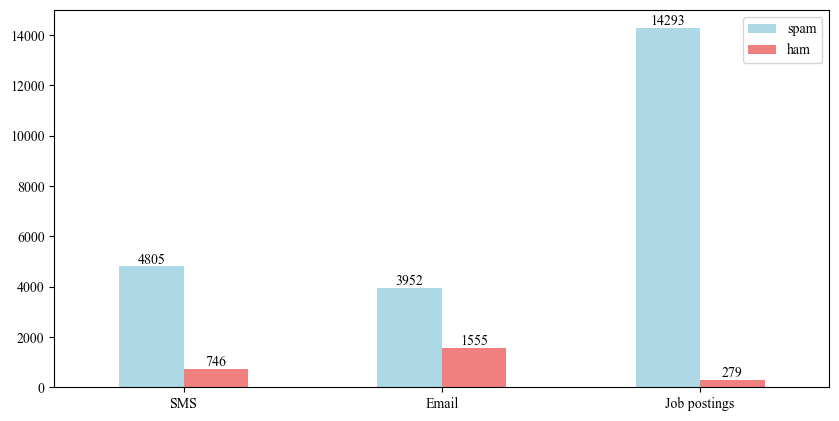

In [25]:
spam_counts = []
ham_counts = []
for i in range(3):
    spam_counts.append(dfs[datasets[i]]['data'].label.value_counts()[0])
    ham_counts.append(dfs[datasets[i]]['data'].label.value_counts()[1])    
    
from matplotlib.pyplot import figure

# figure(figsize=(20, 10), dpi=100)
plt.rcParams["figure.figsize"] = [10,5]
plt.rcParams["figure.dpi"] = 100


index = ['SMS', 'Email', 'Job postings']
df = pd.DataFrame({'spam': spam_counts, 'ham': ham_counts}, index=index)
ax = df.plot.bar(rot=0, color=['lightblue', 'lightcoral'])
   

for bars in ax.containers:
    ax.bar_label(bars)




AttributeError: 'AxesSubplot' object has no attribute 'is_first_col'

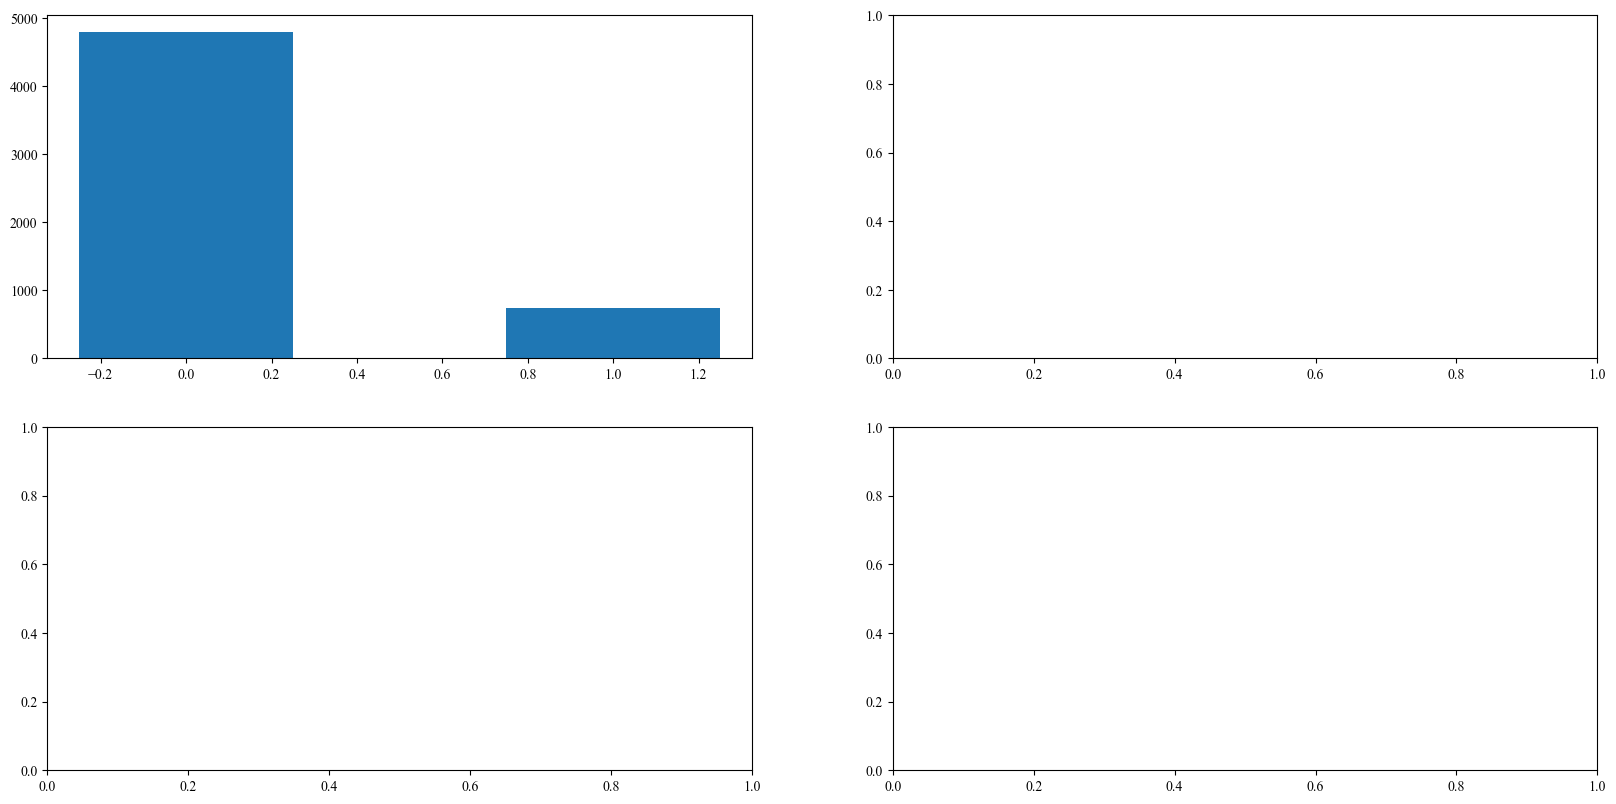

In [23]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(20,10), dpi=100)

dfs[datasets[i]]['data'].label.value_counts().plot(kind='bar', ax=axs.flat[0])